# Proyek 1 Machine Learning Terapan: Used Cars Price Prediction

### Menyiapkan Library yang Dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

### Menyiapkan Dataset

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d 'colearninglounge/used-cars-price-prediction'

  0% 0.00/156k [00:00<?, ?B/s]
100% 156k/156k [00:00<00:00, 61.2MB/s]


In [7]:
!cp used-cars-price-prediction.zip /tmp

In [8]:
import os
import zipfile
local_zip = '/tmp/used-cars-price-prediction.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [9]:
df = pd.read_csv('/tmp/train.csv')

## Data Understanding

In [10]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [12]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [13]:
df = df.drop('New_Price', axis=1)

In [14]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [15]:
df['Mileage'] = pd.to_numeric(df['Mileage'].str.extract('(\d+\.\d+|\d+)', expand=False), errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'].str.extract('(\d+\.\d+|\d+)', expand=False), errors='coerce')
df['Power'] = pd.to_numeric(df['Power'].str.extract('(\d+\.\d+|\d+)', expand=False), errors='coerce')

In [16]:
df = df.dropna()
df.shape

(5872, 12)

In [17]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [18]:
df['Year'] = df['Year'].astype(str)
df['Seats'] = df['Seats'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   object 
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   int64  
 11  Price              5872 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 596.4+ KB


In [19]:
df = df.drop('Name', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   object 
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   int64  
 10  Price              5872 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 550.5+ KB


In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
diamonds=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

diamonds.shape

<ipython-input-20-61769de3f955>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-20-61769de3f955>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-20-61769de3f955>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(4242, 11)

In [21]:
categorical_columns = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type']
numerical_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

            jumlah sampel  persentase
Mumbai                775        13.2
Hyderabad             718        12.2
Kochi                 645        11.0
Coimbatore            629        10.7
Pune                  594        10.1
Delhi                 545         9.3
Kolkata               521         8.9
Chennai               476         8.1
Jaipur                402         6.8
Bangalore             347         5.9
Ahmedabad             220         3.7


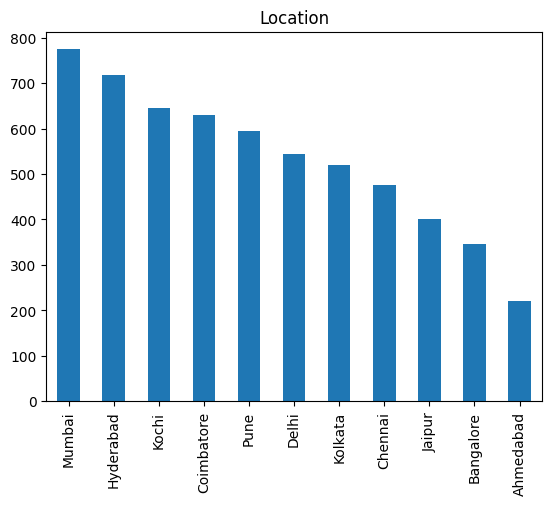

In [22]:
feature = categorical_columns[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature);

      jumlah sampel  persentase
2014            794        13.5
2015            740        12.6
2016            737        12.6
2013            639        10.9
2017            586        10.0
2012            562         9.6
2011            452         7.7
2010            333         5.7
2018            298         5.1
2009            191         3.3
2008            162         2.8
2007            105         1.8
2019            102         1.7
2006             66         1.1
2005             42         0.7
2004             25         0.4
2003             14         0.2
2002             11         0.2
2000              4         0.1
2001              4         0.1
1998              3         0.1
1999              2         0.0


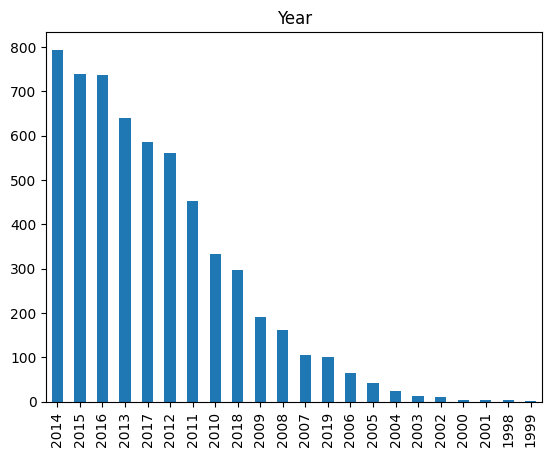

In [23]:
feature = categorical_columns[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature);

        jumlah sampel  persentase
Diesel           3152        53.7
Petrol           2655        45.2
CNG                55         0.9
LPG                10         0.2


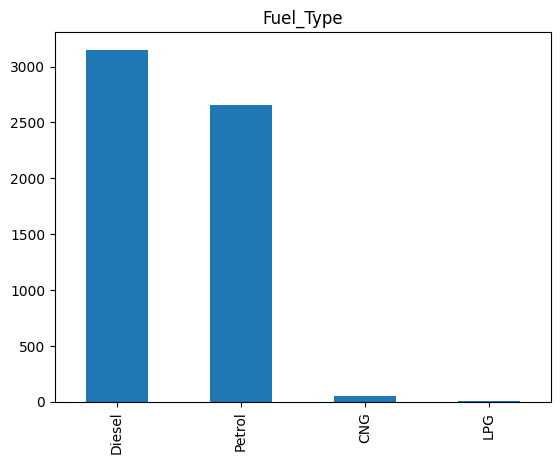

In [24]:
feature = categorical_columns[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
Manual              4170        71.0
Automatic           1702        29.0


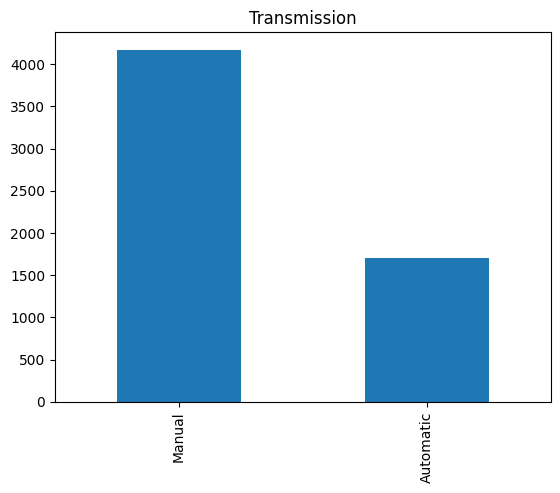

In [25]:
feature = categorical_columns[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature);

                jumlah sampel  persentase
First                    4839        82.4
Second                    925        15.8
Third                     101         1.7
Fourth & Above              7         0.1


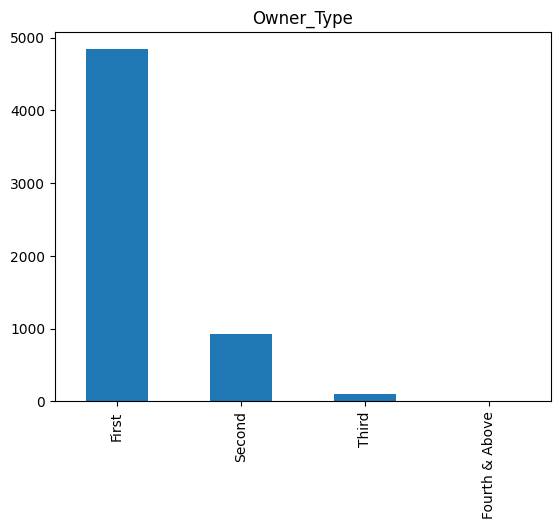

In [26]:
feature = categorical_columns[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)
count.plot(kind='bar', title=feature);

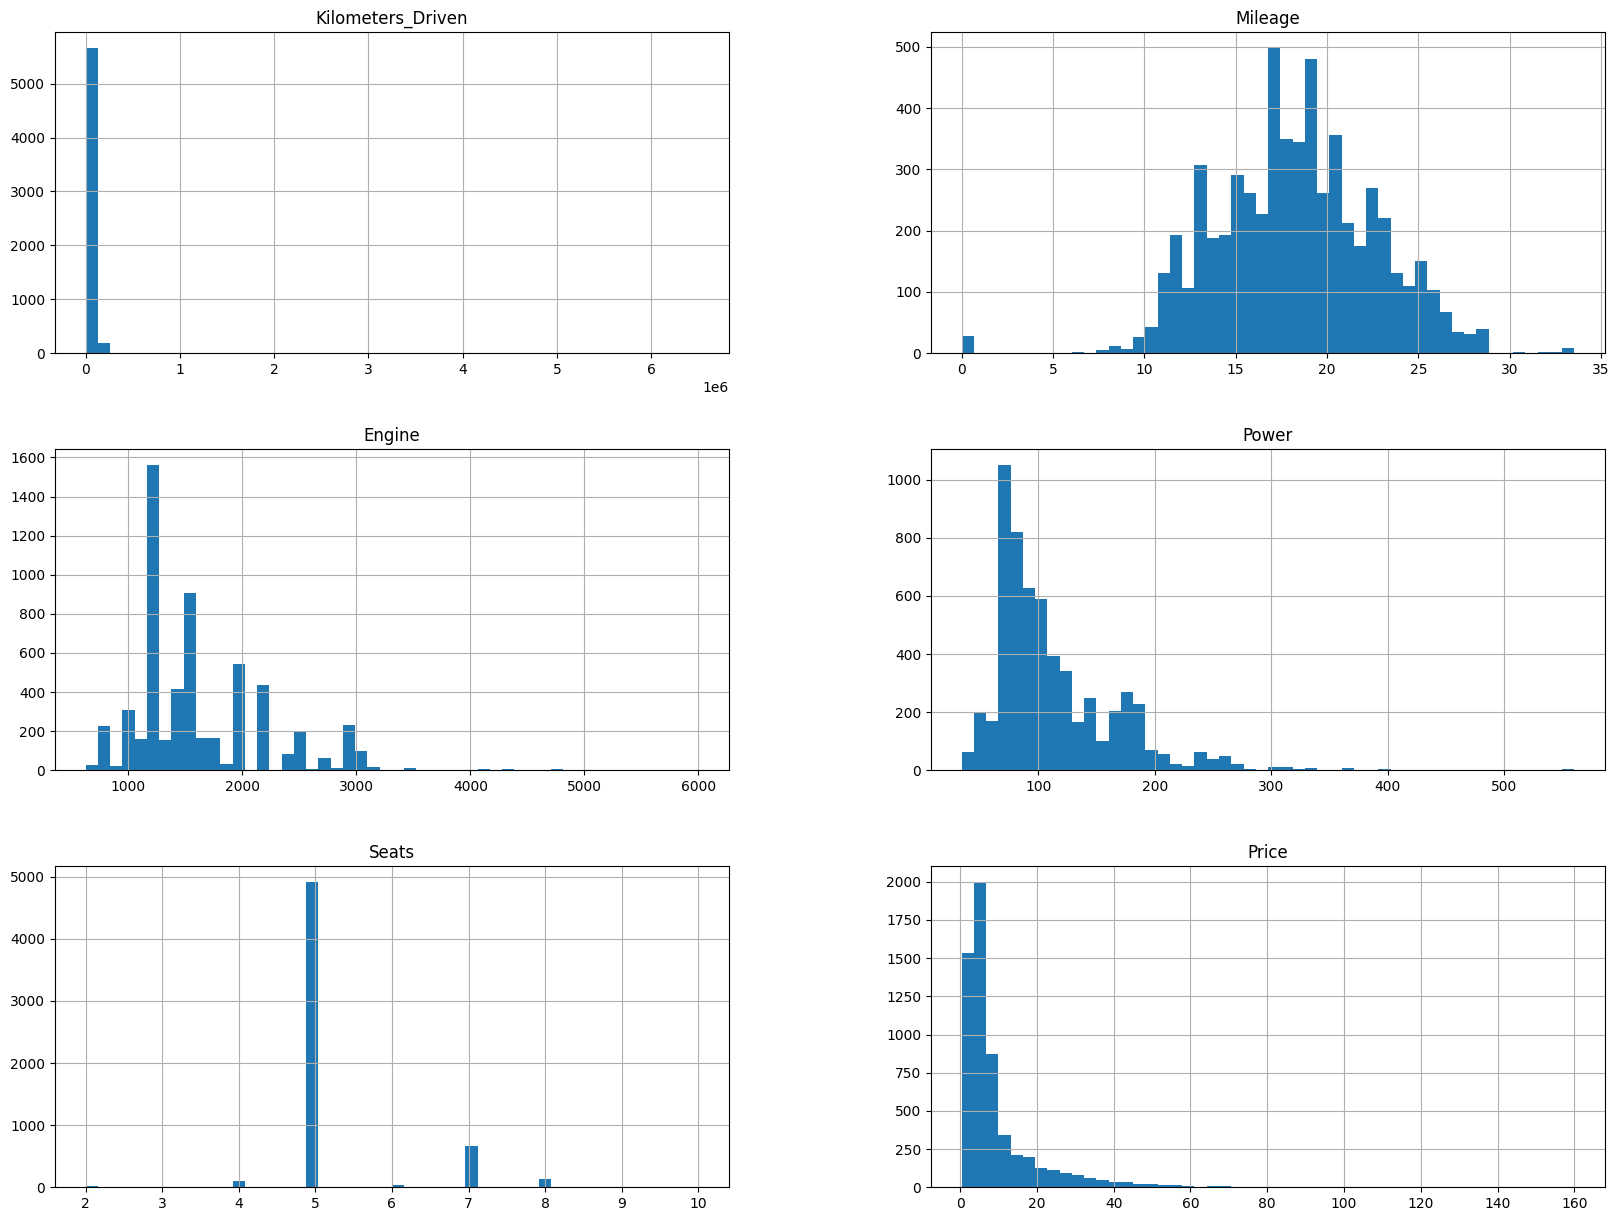

In [27]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-28-4e643cef1de0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-28-4e643cef1de0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-28-4e643cef1de0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-28-4e643ce

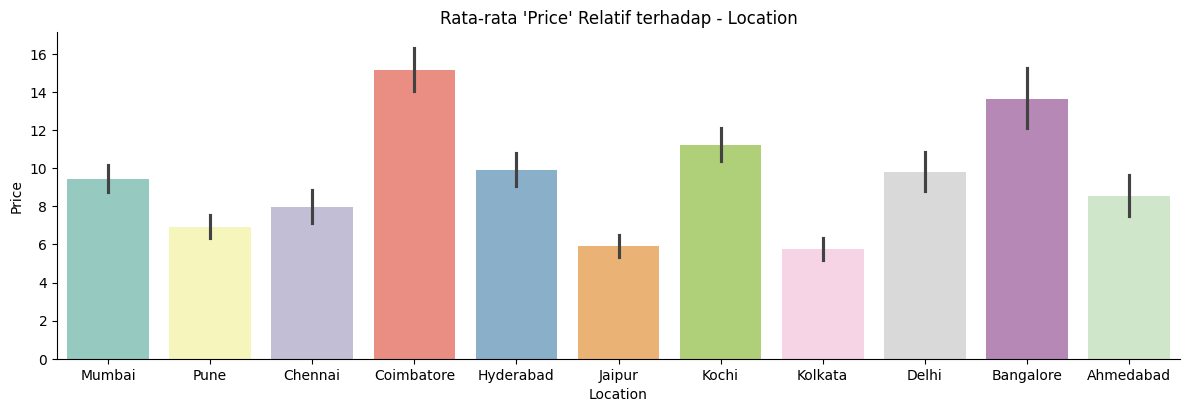

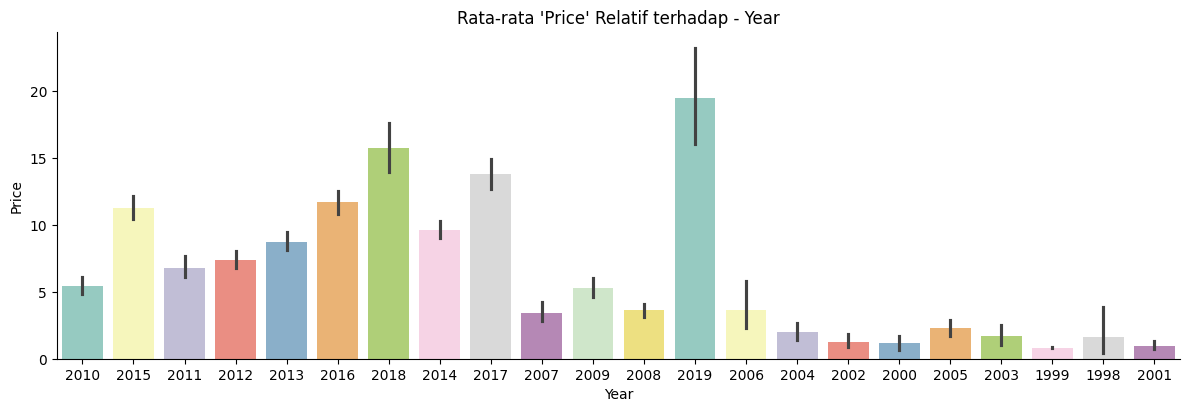

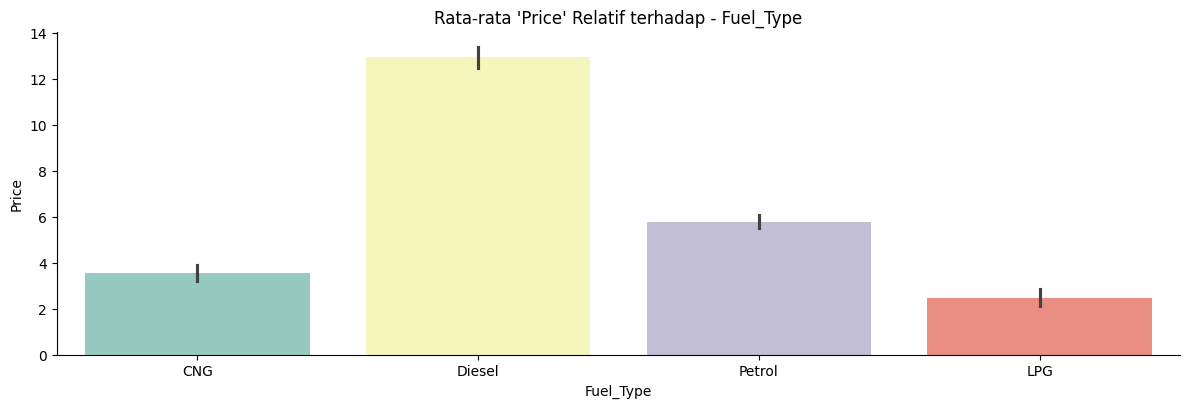

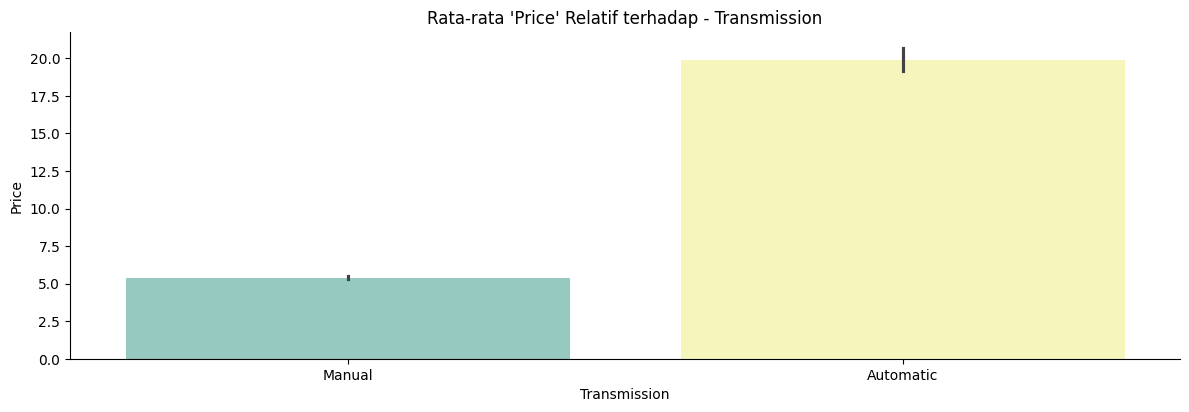

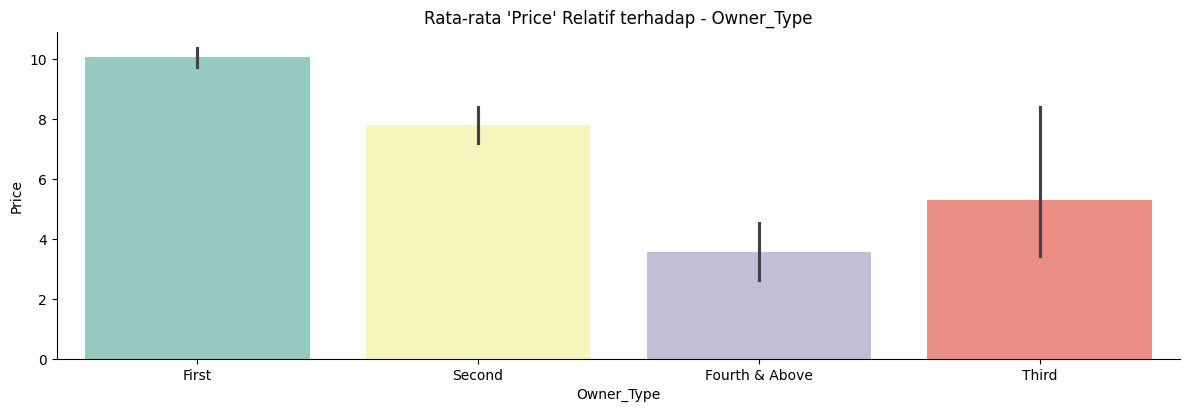

In [28]:
for col in categorical_columns:
  sns.catplot(x=col, y="Price", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Price' Relatif terhadap - {}".format(col))

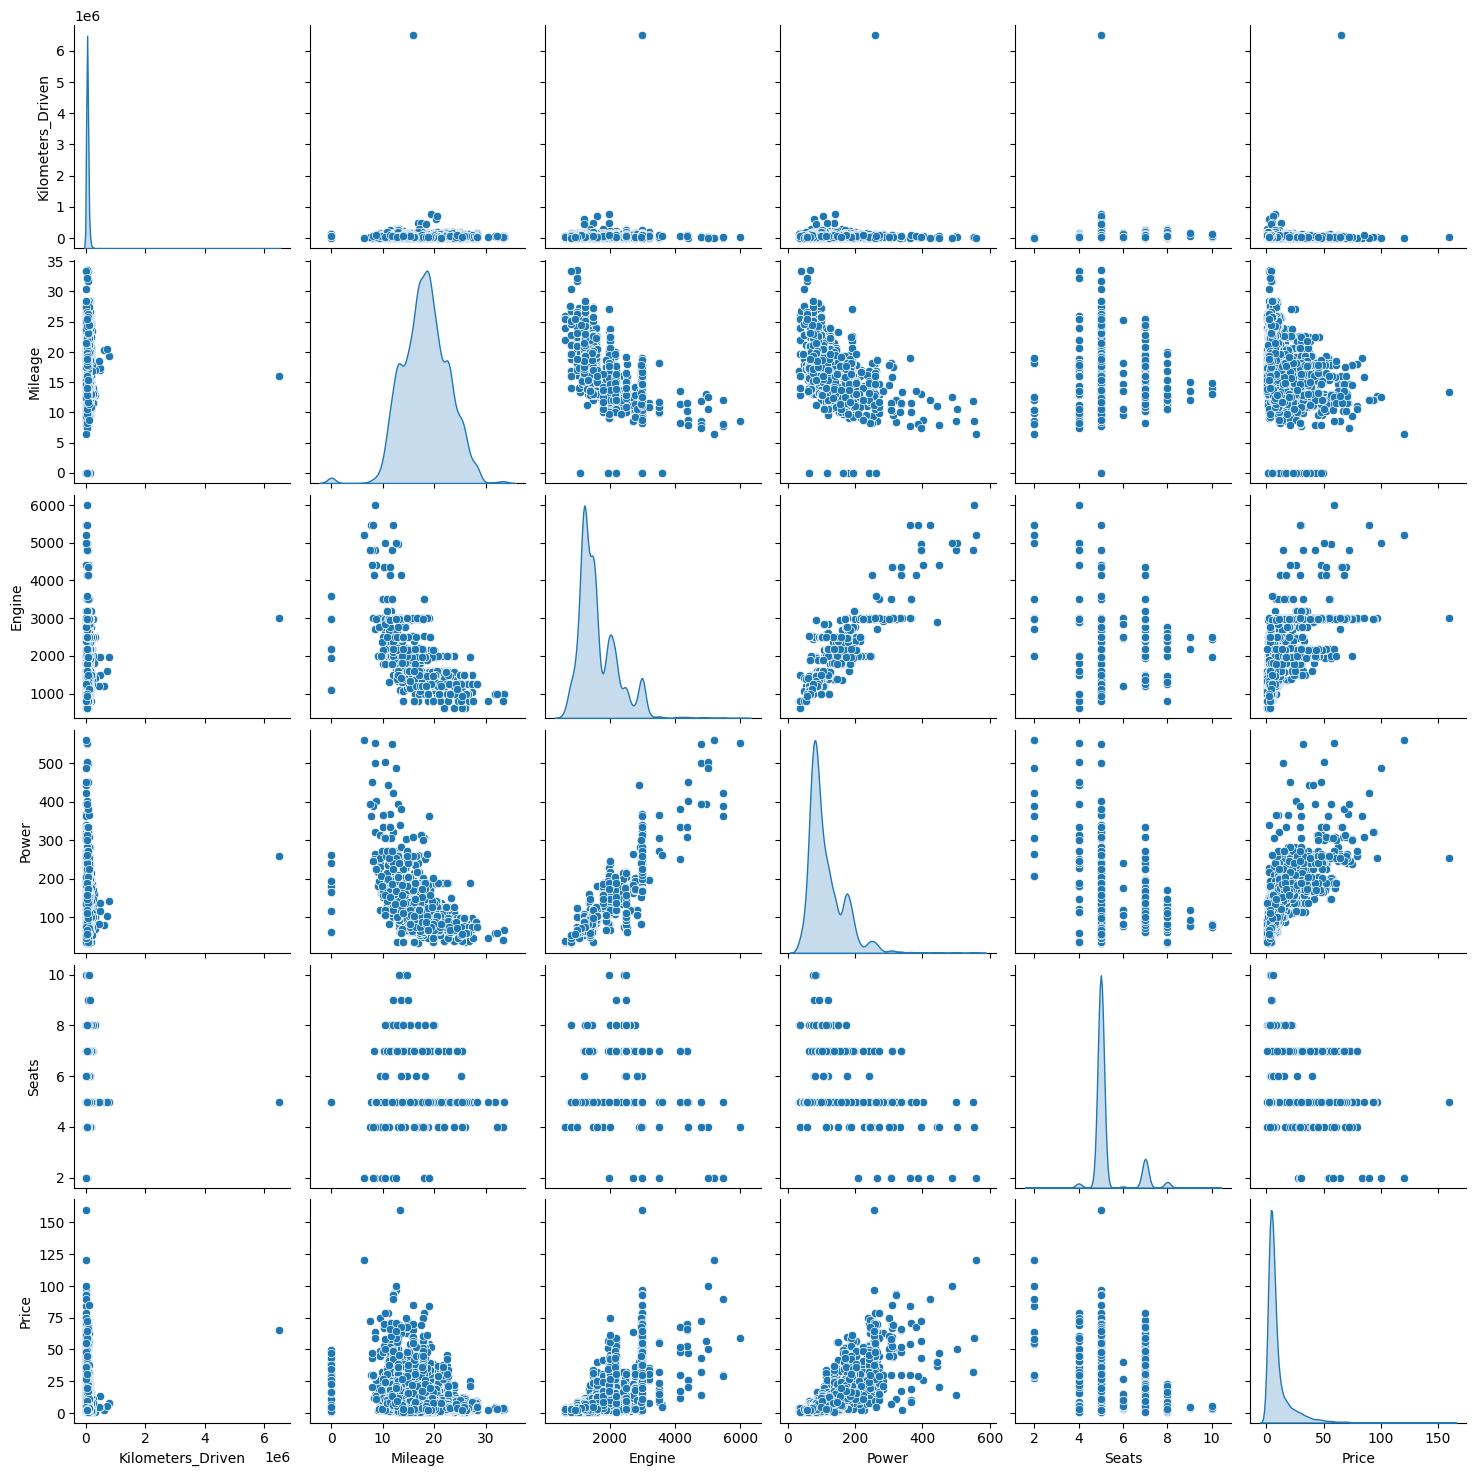

In [29]:
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-30-55e2b04b3706>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

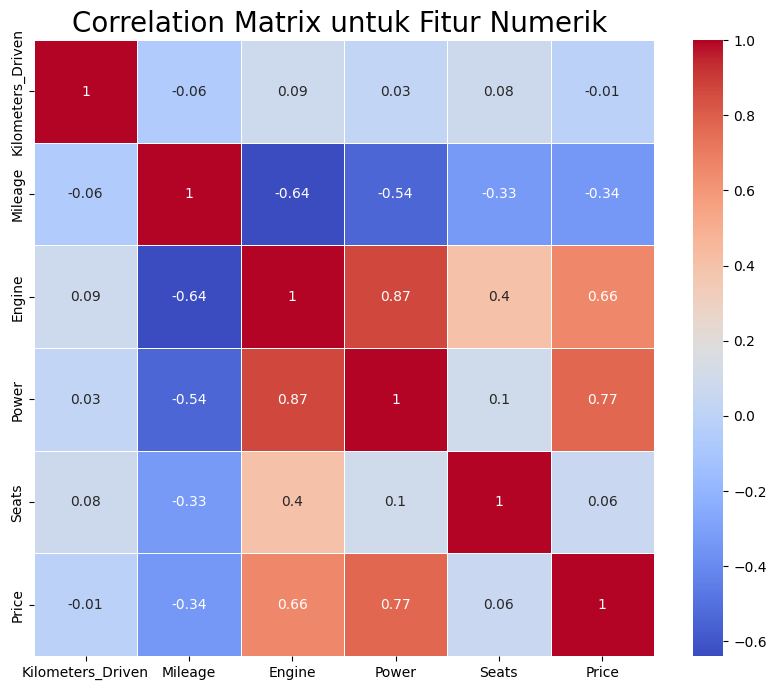

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [31]:
df.drop(['Seats', 'Kilometers_Driven'], inplace=True, axis=1)
df.head()

,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,1.75
1,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,12.50
2,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,4.50
3,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,6.00
4,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,17.74


## Data Preparation

In [32]:
df = pd.concat([df, pd.get_dummies(df['Location'], prefix='Location')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Year'], prefix='Year')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Fuel_Type'], prefix='Fuel_Type')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Transmission'], prefix='Transmission')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Owner_Type'], prefix='Owner_Type')], axis=1)
df.drop(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis=1, inplace=True)
df.head()

,Mileage,Engine,Power,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,26.60,998.0,58.16,1.75,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,19.67,1582.0,126.20,12.50,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,18.20,1199.0,88.70,4.50,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0
3,20.77,1248.0,88.76,6.00,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,15.20,1968.0,140.80,17.74,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [33]:
pca = PCA(n_components=2, random_state=123)
pca.fit(df[['Engine', 'Power']])
princ_comp = pca.transform(df[['Engine', 'Power']])

In [34]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002])

In [35]:
pca = PCA(n_components=1, random_state=123)
pca.fit(df[['Engine', 'Power']])
df['EnginePower'] = pca.transform(df.loc[:, ('Engine', 'Power')]).flatten()
df.drop(['Engine', 'Power'], axis=1, inplace=True)

In [36]:
df.head()

,Mileage,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,...,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,EnginePower
0,26.60,1.75,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,-630.129126
1,19.67,12.50,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,-42.612378
2,18.20,4.50,0,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,-427.366738
3,20.77,6.00,0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,-378.509481
4,15.20,17.74,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,343.358092


In [37]:
X = df.drop(["Price"],axis =1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5872
Total # of sample in train dataset: 4697
Total # of sample in test dataset: 1175


In [38]:
numerical_features = ['Mileage', 'EnginePower']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Mileage,EnginePower
2616,-0.892344,0.630067
595,1.577079,-0.618617
609,-0.661621,0.923037
3615,1.165889,-0.618617
1533,-0.293835,-0.046747


## Model Development

In [39]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [40]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [41]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [42]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluation

In [43]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [44]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,0.028183,0.042867
RF,0.004026,0.027424
Boosting,0.045626,0.05815


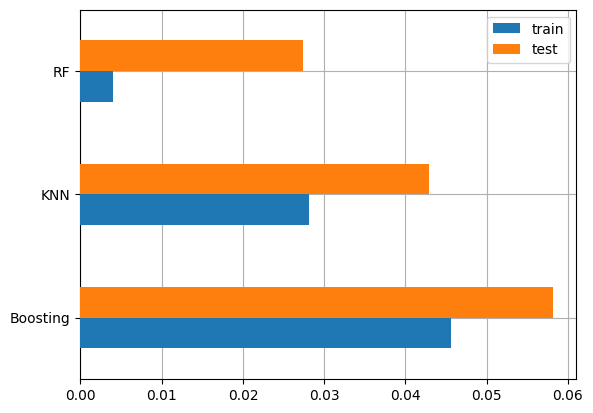

In [45]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [46]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
5736,5.50,5.8,6.4,4.9
1205,11.51,5.8,9.9,9.7
2966,4.85,5.1,5.3,4.9
565,5.60,5.9,5.3,6.1
4445,17.95,14.4,17.1,14.5


#### Model dengan performa terbaik: Random Forest